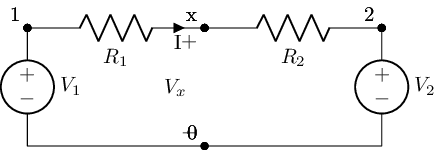

In [1]:
from lcapy import Circuit
cct = Circuit("""
V1 1 0_1 dc; down
R1 1 x; right=1.5, i=I
R2 x 2; right=1.5
V2 2 0_2 dc; down
W 0_1 0; right
W 0 0_2; right
Ox x 0; down, v=V_x
""")
cct.draw(label_ids=True)

Let's determine the current through R1.  There are many ways to solve this; the easiest is to combine the sources, combine the resistances, and then use Ohm's law. You can also use the principle of superposition.

In [2]:
cct.R1.I

V₁ - V₂
───────
R₁ + R₂

Not surprisingly due to KCL, this is the same as the current through R2.

In [3]:
cct.R2.I

V₁ - V₂
───────
R₁ + R₂

Now given the current, we can use Ohm's law to determine the voltage drop across R1.

In [4]:
cct.R1.Z * cct.R1.I

R₁⋅(V₁ - V₂)
────────────
  R₁ + R₂   

Lcapy can determine this directly.

In [5]:
cct.R1.V

     R₁⋅V₂ + R₂⋅V₁
V₁ - ─────────────
        R₁ + R₂   

This can be simplified...

In [6]:
cct.R1.V.simplify()

R₁⋅(V₁ - V₂)
────────────
  R₁ + R₂   

Using KVL, the unknown voltage is thus the voltage generated by the source V1 minus the voltage drop across R1.

In [7]:
cct.V1.V - cct.R1.V

R₁⋅V₂ + R₂⋅V₁
─────────────
   R₁ + R₂   

Of course, Lcapy can determine this directly.  Here Ox is the name of the open circuit over which we wish to determine the voltage difference.

In [8]:
cct.Ox.V

R₁⋅V₂ + R₂⋅V₁
─────────────
   R₁ + R₂   

Alternatively, we can query Lcapy for the voltage at node 'x' with respect to ground.

In [9]:
cct['x'].V

R₁⋅V₂ + R₂⋅V₁
─────────────
   R₁ + R₂   

Finally, we should check that the answer makes sense.  It is between 4 and 8 V and so is plausible.  Oh, we should also specify the units for each of our answers.  This helps to find errors.

Let's now try using superposition.  We start by analysing the circuit with all the sources except V1 killed.

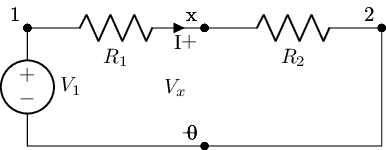

In [10]:
cct2 = cct.kill_except('V1')
cct2.draw()

This is a simpler circuit to analyse.  We can either recognise the circuit as a voltage divider or calculate the current and find the voltage drops.  Let's use the latter approach.  Combining the resistances gives R1 + R2 and using Ohm's law, the current through R1 and R2 is given by:

In [11]:
cct2.V1.V / (cct2.R1.Z + cct2.R2.Z)

   V₁  
───────
R₁ + R₂

Lcapy can determine this directly:

In [12]:
cct2.R2.I

   V₁  
───────
R₁ + R₂

The voltage drop across R2 can then be found from Ohm's law.

In [13]:
cct2.R2.I * cct2.R2.Z

 R₂⋅V₁ 
───────
R₁ + R₂

Again, Lcapy can determine this directly:

In [14]:
cct2['x'].V

 R₂⋅V₁ 
───────
R₁ + R₂

So we have determine the voltage Vx due to source V1.  Let's now kill just V2 and determine the voltage Vx due to V2.

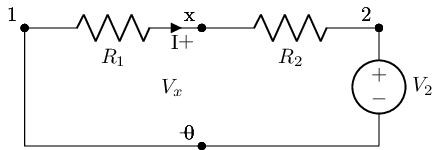

In [15]:
cct3 = cct.kill_except('V2')
cct3.draw()

In this circuit the current flows in the opposite direction to the labelled current I.  Thus we will get a negative value for the current.  If you do not like negative currents, just relabel the current direction.

The unknown voltage Vx can be found as before, either by using the principle of the voltage divider or by calculating the current through R1 and R2 and then determining the voltage across R1.  

In [16]:
cct3['x'].V

 R₁⋅V₂ 
───────
R₁ + R₂

We now know Vx due to V1 and Vx due to V2.  Due to linearity, the total voltage Vx is simply the sum of the two contributions:

In [17]:
cct2['x'].V + cct3['x'].V

 R₁⋅V₂     R₂⋅V₁ 
─────── + ───────
R₁ + R₂   R₁ + R₂

If we simplify this, we get the same result as determined earlier.

In [18]:
Vx = cct2['x'].V + cct3['x'].V
Vx.simplify()

R₁⋅V₂ + R₂⋅V₁
─────────────
   R₁ + R₂   